In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import RobustScaler

# 1. Load the data
df = pd.read_csv('creditcard.csv')

# 2. Scale Time and Amount (The only columns not yet scaled)
# RobustScaler is best because fraud data has many "Outliers" (weirdly high amounts)
rob_scaler = RobustScaler()

df['scaled_amount'] = rob_scaler.fit_transform(df['Amount'].values.reshape(-1,1))
df['scaled_time'] = rob_scaler.fit_transform(df['Time'].values.reshape(-1,1))

# Drop the messy original columns
df.drop(['Time','Amount'], axis=1, inplace=True)

print("Dataset Loaded and Scaled!")
print(df.head())

Dataset Loaded and Scaled!
         V1        V2        V3        V4        V5        V6        V7  \
0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9       V10  ...       V22       V23       V24       V25  \
0  0.098698  0.363787  0.090794  ...  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425 -0.166974  ... -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  0.207643  ...  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024 -0.054952  ...  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  0.753074  ...  0.798278 -0.137458  0.141267 -0.206010   

        V26       V27       V28  Class  s

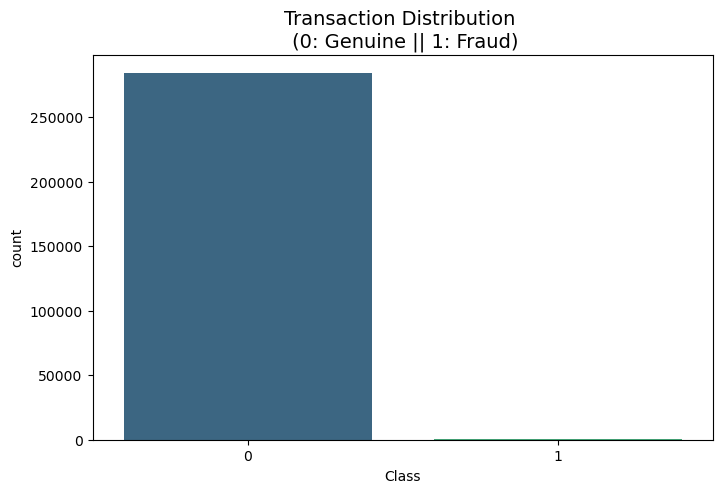

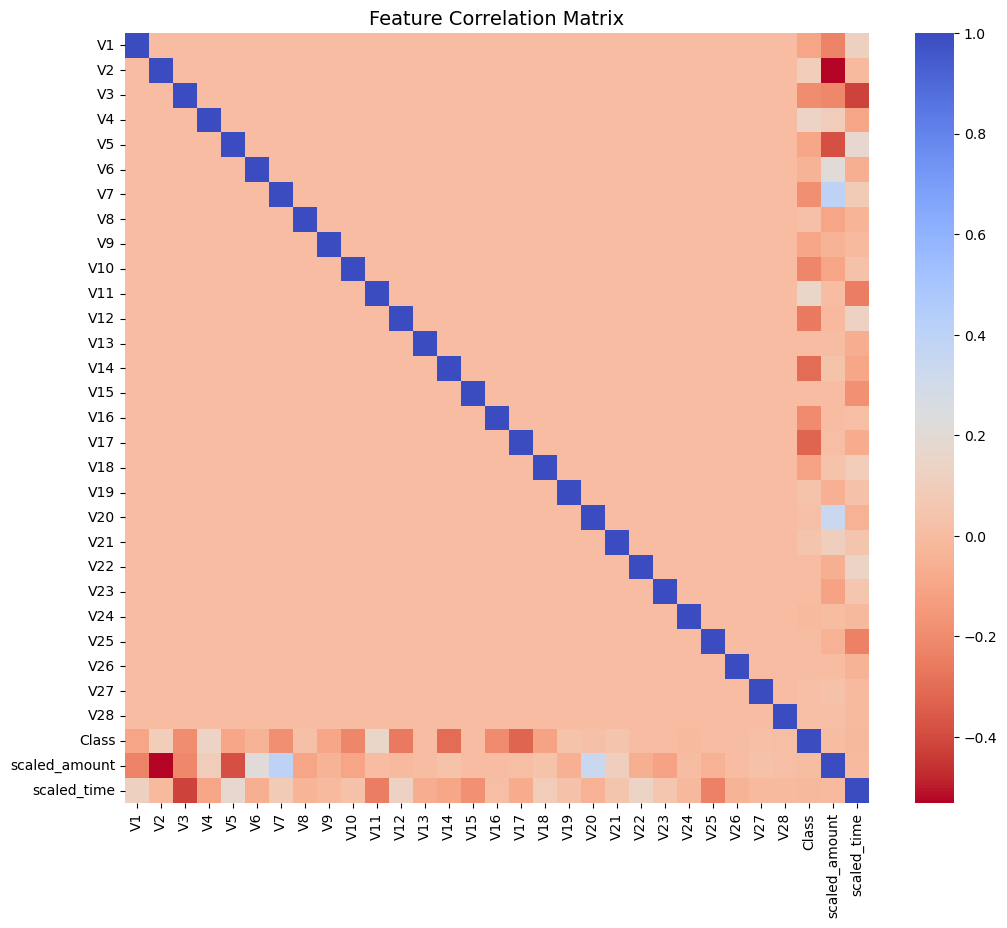

In [2]:
# Create a plot showing the massive imbalance
plt.figure(figsize=(8, 5))
sns.countplot(x='Class', data=df, palette='viridis')
plt.title('Transaction Distribution \n (0: Genuine || 1: Fraud)', fontsize=14)
plt.show()

# Show the correlation - which features actually hint at fraud?
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(), cmap='coolwarm_r', annot_kws={'size':20})
plt.title('Feature Correlation Matrix', fontsize=14)
plt.show()

In [3]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

# Split into Features (X) and Target (y)
X = df.drop('Class', axis=1)
y = df['Class']

# Split into Train and Test sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply SMOTE only to the Training data (to avoid 'Data Leakage')
sm = SMOTE(random_state=42)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)

print(f"Before SMOTE: {np.bincount(y_train)}")
print(f"After SMOTE: {np.bincount(y_train_res)}")

Before SMOTE: [227451    394]
After SMOTE: [227451 227451]


--- Classification Report ---
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.88      0.85      0.86        98

    accuracy                           1.00     56962
   macro avg       0.94      0.92      0.93     56962
weighted avg       1.00      1.00      1.00     56962



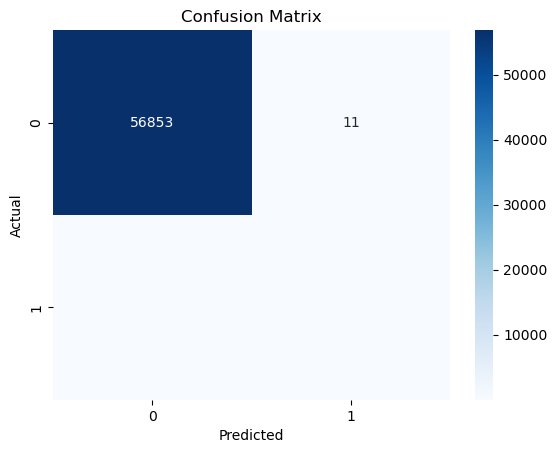

In [5]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Initialize and Train
rf = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
rf.fit(X_train_res, y_train_res)

# Make Predictions
y_pred = rf.predict(X_test)

# Display Results
print("--- Classification Report ---")
print(classification_report(y_test, y_pred))

# Confusion Matrix Visualization
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()